In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import (
    datasets, metrics, model_selection as skms, neighbors
)

In [2]:
dataset = datasets.load_iris()

In [3]:
train_sizes = np.linspace(0.1, 1.0, 20)
train_sizes

array([0.1       , 0.14736842, 0.19473684, 0.24210526, 0.28947368,
       0.33684211, 0.38421053, 0.43157895, 0.47894737, 0.52631579,
       0.57368421, 0.62105263, 0.66842105, 0.71578947, 0.76315789,
       0.81052632, 0.85789474, 0.90526316, 0.95263158, 1.        ])

In [5]:
nn = neighbors.KNeighborsClassifier()
(train_N, train_scores, test_scores) = skms.learning_curve(nn, dataset.data, dataset.target, cv=10, train_sizes=train_sizes)

In [6]:
df = pd.DataFrame(test_scores, index=(train_sizes*100).astype(int))
df["Mean 5-CV"] = df.mean(axis="columns")
df.index.name = "% of dataset used."
display(df)

,0,1,2,3,4,5,6,7,8,9,Mean 5-CV
% of dataset used.,,,,,,,,,,,
10,0.333333,0.333333,0.333333,0.333333,0.333333,0.333333,0.333333,0.333333,0.333333,0.333333,0.333333
14,0.333333,0.333333,0.333333,0.333333,0.333333,0.333333,0.333333,0.333333,0.333333,0.333333,0.333333
19,0.333333,0.333333,0.333333,0.333333,0.333333,0.333333,0.333333,0.333333,0.333333,0.333333,0.333333
24,0.333333,0.333333,0.333333,0.333333,0.333333,0.333333,0.333333,0.333333,0.333333,0.333333,0.333333
28,0.333333,0.333333,0.333333,0.333333,0.333333,0.333333,0.333333,0.333333,0.333333,0.333333,0.333333
33,0.333333,0.333333,0.333333,0.333333,0.333333,0.333333,0.333333,0.333333,0.333333,0.333333,0.333333
38,0.666667,0.600000,0.666667,0.666667,0.666667,0.666667,0.666667,0.666667,0.600000,0.600000,0.646667
43,0.666667,0.666667,0.666667,0.666667,0.666667,0.666667,0.666667,0.666667,0.666667,0.666667,0.666667
47,0.666667,0.666667,0.666667,0.666667,0.666667,0.666667,0.666667,0.666667,0.666667,0.666667,0.666667


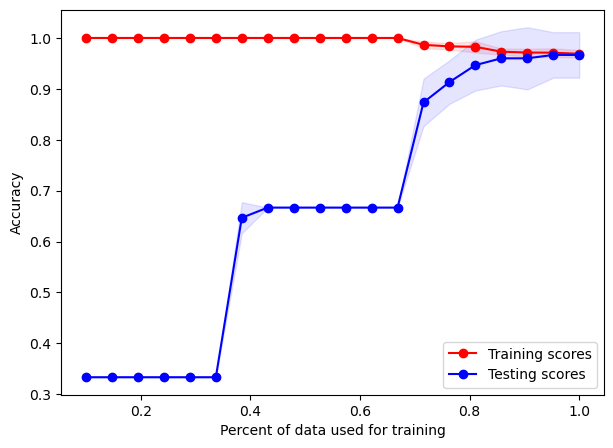

In [7]:
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)
plt.figure(figsize=(7,5)).gca()
plt.plot(train_sizes, train_mean, "o-", color="r", label="Training scores")
plt.plot(train_sizes, test_mean, "o-", color="b", label="Testing scores")
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, color="r", alpha=0.1)
plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, color="b", alpha=0.1)
plt.xlabel("Percent of data used for training")
plt.ylabel("Accuracy")
plt.legend(loc="best")